# TED TALKS

### Uma análise dos vídeos criados ao longo de 52 anos

Desde seu surgimento o TED Talks tem o propósito de disseminar ideias por meio de conferências feitas na Europa, Ásia e Américas, de forma que além das conferências, existem os vídeos, a fim de possibilitar mais ainda a disseminação das ideias que merecem sê-las, conforme seu próprio slogan.

Esta análise tem como objetivo verificar como os vídeos do TED Talks se comportaram ao longo dos anos, em relação às visualizações, likes e quantidade de vídeos postados, bem como a progressão dos maiores autores sobre as ditas variáveis.

##### Discentes: Luís Henrique Augustoo de Lima e Rafael Barboza de Almeida

Inicialmente vamos importar as bibliotecas necessárias para o projeto e inicializar o dataset original.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from scipy.stats import linregress
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD



In [3]:
df= pd.read_csv('TED_TALKS_data.csv').drop(columns =['link'])
df.head()

,title,author,date,views,likes
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72


Para este dataset iremos modificar suas colunas em alguns momentos, além de criar dataframes auxiliares, cada um com seu fim específico, para organizar melhor os dados.

In [4]:
#Iicializando os datasets auxiliares e separando o ANO da coluna DATE no dataset original

df2 = pd.DataFrame()  # Em relação aos anos
df3 = pd.DataFrame()  # Em relação aos autores

df['date'] = pd.to_datetime(df['date'])
df['anos']= df['date'].dt.year
df.sort_values(by='views', ascending = False).head()

,title,author,date,views,likes,anos
5436,Do schools kill creativity?,Sir Ken Robinson,2006-02-01,72000000,2100000,2006
4084,Your body language may shape who you are,Amy Cuddy,2012-06-01,64000000,1900000,2012
2958,Inside the mind of a master procrastinator,Tim Urban,2016-02-01,60000000,1800000,2016
4765,How great leaders inspire action,Simon Sinek,2009-09-01,57000000,1700000,2009
4605,The power of vulnerability,Brené Brown,2010-06-01,56000000,1700000,2010


Agora iremos começar a coletar os dados mais específicos que serão utilizados para as futuras análises, agrupando-os nos dataframes já inicializados (df2 e df3).

### Coletando dados referente aos vídeos
##### Agrupando dados no dataframe 2 (df2)

In [5]:
#Agrupando todos os anos (sem repetições) do dataframe original

anossemrep = []
for c in df['anos']:
    if c not in anossemrep:
        anossemrep.append(c)
anossemrep = pd.DataFrame(anossemrep, columns = ['Ano']).sort_values(by="Ano", ascending=False).reset_index(drop=True)
df2['Anos'] = anossemrep

In [6]:
#Coletando a quantidade de vídeos postados por ano

contagemano= []
for c in anossemrep['Ano']:
    cont = 0
    for i in df['anos']:
        if c == i:
            cont += 1
    contagemano.append(cont)
contagemano = pd.DataFrame(contagemano, columns=['Quantidade de Vídeos'])
df2['Quantidade de Vídeos'] = contagemano

In [7]:
#Coletando as visualizações por ano

viewyear= []
for c in anossemrep['Ano']:
    total = 0
    for n ,i in enumerate(df['anos']):
        if c == i:
            total += df['views'][n]
    viewyear.append(total)
viewyear = pd.DataFrame(viewyear, columns=['Visualização']).reset_index().drop(columns=['index'])
df2['Visualização'] = viewyear

In [8]:
#Coletando a quantidade de likes por ano

likes = []
for c in anossemrep['Ano']:
    total = 0
    for n ,i in enumerate(df['anos']):
        if c == i:
            total += df['likes'][n]
    likes.append(total)
likes = pd.DataFrame(likes, columns=['Likes']).reset_index().drop(columns=['index'])
df2['Likes'] = likes

In [9]:
#Calculando a média de visualizações por ano

media_views = pd.DataFrame(viewyear['Visualização'] / contagemano['Quantidade de Vídeos'], columns=['Média de visualização']).round(2)
df2['Média de visualização'] = media_views

In [10]:
# Calculando a média de likes por ano

media_like = pd.DataFrame(df2['Likes'] / df2['Quantidade de Vídeos'], columns=['Média de likes']).round(2)
df2['Média de Likes'] = media_like

Agora, podemos ver como ficou o primeiro dataframe auxiliar após a coleta dos dados anteriores.

In [11]:
df2.head()

,Anos,Quantidade de Vídeos,Visualização,Likes,Média de visualização,Média de Likes
0,2022,20,11470000,341254,573500.00,17062.70
1,2021,390,429728700,13058238,1101868.46,33482.66
2,2020,501,635944200,19297014,1269349.70,38516.99
3,2019,544,948119299,28764575,1742866.36,52876.06
4,2018,473,811857597,24671493,1716400.84,52159.60


### Coletando dados referente aos autores
##### Agrupando dados no dataframe 3 (df3)

In [12]:
#Agrupando o nome de todos os autores (sem repetição)

autsemrep = []
for a in df['author']:
    if a not in autsemrep:
        autsemrep.append(a)
autsemrep = pd.DataFrame(autsemrep, columns = ['Autor'])
df3['Autor'] = autsemrep

In [13]:
#Coletando a quantidade de vídeos postados por cada autor

contagemaut= []
for c in autsemrep['Autor']:
    cont = 0
    for i in df['author']:
        if c == i:
            cont += 1
    contagemaut.append(cont)
contagemaut = pd.DataFrame(contagemaut, columns=['Quantidade de Vídeos'])
df3['Quantidade de Vídeos'] = contagemaut

In [14]:
#Coletando a quantidade de visualizações por autor

viewaut= []
for c in autsemrep['Autor']:
    total = 0
    for n ,i in enumerate(df['author']):
        if c == i:
            total += df['views'][n]
    viewaut.append(total)
viewaut = pd.DataFrame(viewaut, columns=['Visualizações totais']).reset_index().drop(columns=['index'])
df3['Visualizações totais'] = viewaut

In [15]:
#Coletando a quantidade de likes por autor

likesaut = []
for c in autsemrep['Autor']:
    total = 0
    for n ,i in enumerate(df['author']):
        if c == i:
            total += df['likes'][n]
    likesaut.append(total)
likesaut = pd.DataFrame(likesaut, columns=['Likes totais']).reset_index().drop(columns=['index'])
df3['Likes totais'] = likesaut

A seguir vamos utilizar mais alguns dataframes auxiliares para agruparem de forma mais específica alguns dados referentes aos autores, de forma que facilitarão na hora das análises referente a cada grupo.

In [16]:
# Agrupando os 10 maiores autores em relação à quantidade de vídeos postados

df3_vp = pd.DataFrame()
df3_vp = df3.sort_values(by='Quantidade de Vídeos', ascending = False).reset_index().drop(columns=['index']).iloc[0:5]

In [17]:
# Agrupando os 10 maiores autores em relação às visualizações totais

df3_vt = pd.DataFrame()
df3_vt = df3.sort_values(by='Visualizações totais', ascending = False).reset_index().drop(columns=['index']).iloc[0:5]

In [18]:
# Agrupando os 10 maiores autores em relação à quantidade de likes totais

df3_lt = pd.DataFrame()
df3_lt = df3.sort_values(by='Likes totais', ascending = False).reset_index().drop(columns=['index']).iloc[0:5]

In [19]:
# Organizando o df3 

df3 = df3.sort_values(by='Autor', ascending = True)
df3.sort_values(by='Quantidade de Vídeos', ascending = False).head()

,Autor,Quantidade de Vídeos,Visualizações totais,Likes totais
63,Alex Gendler,45,187196000,5691000
6,Iseult Gillespie,33,54998000,1660900
64,Matt Walker,18,27948000,837500
108,Alex Rosenthal,15,14613000,434100
26,Elizabeth Cox,13,25928999,780000


# Perguntas

A partir do processamento dos dados, finalmente podemos começar a analisar o que os dados trazem consigo.

Inicialmente foram definidas as seguintes perguntas:

• Qual foi o TED Talk mais visualizado?
• Qual o TED Talk mais curtido?
• Qual o(a) palestrante mais famoso (de acordo com número de likes)?
• Qual o ano em que houve mais TED Talks lançados?
• Qual palestrante tem mais TED Talks?

Perguntas facilmente respondidas através dos DataFrames criados. Porém, à medida que o trabalho evoluiu, podemos perceber que seria possível incluir diversas perguntas, além de buscar mais informações específicas sobre determinados pontos. Sendo assim, a seguir iremos enumerar e demonstrar diversas observações que podemos obter a partir dos dados obtidos.

## O que podemos concluir através das variáveis obtidas pelos vídeos em si?
### Análises iniciais

Como foi explicado anteriormente, o DataFrame "df2" foi utilizado para coletar dados referentes aos vídeos, o DataFrame "df3" para coletar dados referentes aos autores eo DataFrame "df" foi a base inicial, que serviu para coletar dados como o número de visualizações por ano, média de visualizações e curtidas, quantidade de vídeos postados, etc. Desta forma, iremos utilizá-los para demonstrar as respostas das perguntas iniciais.

In [20]:
# Padronização do tamanho dos gráficos

plt.rcParams['figure.figsize']=(15,8)

In [21]:
# Qual o TED mais curtido?

df.sort_values(by="likes", ascending = False).head(1)

,title,author,date,views,likes,anos
5436,Do schools kill creativity?,Sir Ken Robinson,2006-02-01,72000000,2100000,2006


In [22]:
# Qual o TED mais visualizado?

df.sort_values(by="views", ascending = False).head(1)

,title,author,date,views,likes,anos
5436,Do schools kill creativity?,Sir Ken Robinson,2006-02-01,72000000,2100000,2006


Text(0.5, 1.0, 'Palestrantes com mais likes')

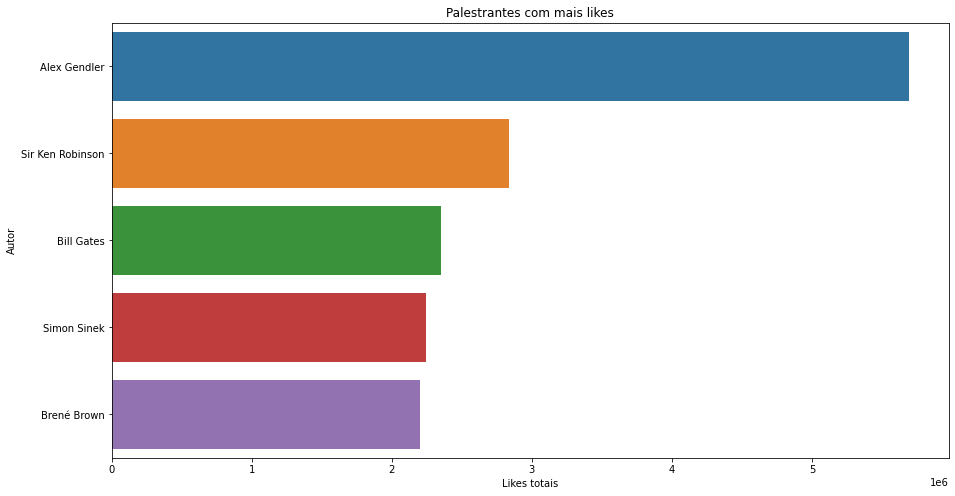

In [23]:
# Qual o(a) palestrante mais famoso (de acordo com o número de likes)?

sns.barplot(data=df3_lt, x="Likes totais", y="Autor").set_title("Palestrantes com mais likes")

Text(0.5, 1.0, 'Quantidade de vídeos postados por ano')

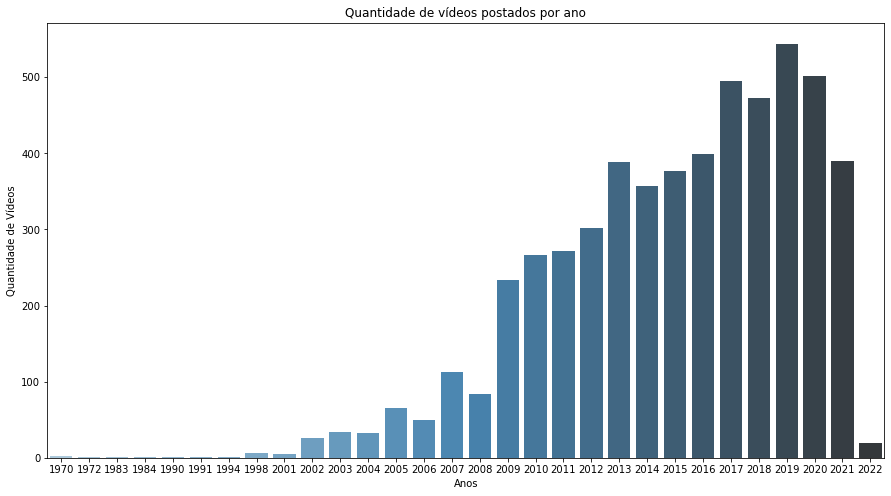

In [24]:
# Qual o ano em que houve mais TED Talks lançados?

sns.barplot(data=df2, x="Anos", y="Quantidade de Vídeos", palette="Blues_d").set_title('Quantidade de vídeos postados por ano')

Text(0.5, 1.0, 'Palestrantes com mais vídeos postados')

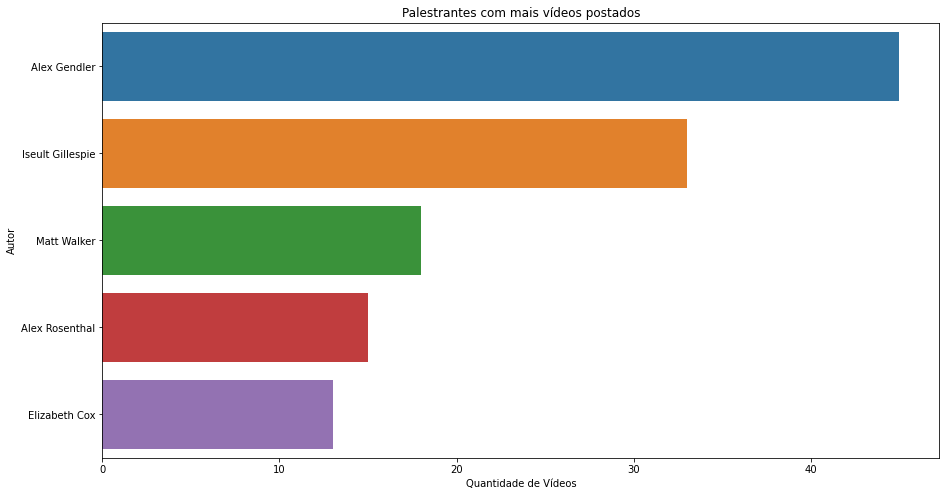

In [25]:
# Qual palestrante tem mais TED Talks?

sns.barplot(data=df3_vp, x="Quantidade de Vídeos", y="Autor").set_title("Palestrantes com mais vídeos postados")

### Análises posteriores

A partir de agora iremos tratar de outras variáveis, como também realizar o agrupamento de determinadas icógnitas e realizar os procedimentos requisitados para o relatório final.

##### Quais perguntas a mais podemos responder?

No decorrer do trabalho foi possível visualizar que alguns autores possuem uma quantidade de vídeos bastante maior que os demais. Sendo assim, iremos discorrer um pouco sobre este autor, a fim de ter um panorama geral a respeito de quem é o autor e também sobre os temas abordados pelo mesmo e entender um pouco sobre seu sucesso nos TED Talks.

Como podemos ver no DafaFrame "df3", o autor com mais vídeos postados, visualizações e likes é o Alex Gendler.
<br>
<img src = "alex_gendler.jpg">
<br>
Diferentemente de muito dos outros autores no dataframe, Alex na verdade é um educador e seus vídeos são postados principalmente na plataforma TED-Ed, onde são encontrados vídeos de duração curta ou média sobre assuntos como saúde pública, estudo social, ciência, tecnologia, design, engenharia, entre tantos outros temas. Vídeos esses que podem ser animados (como os postados pelo Alex), como também palestras específicas publicadas no portal.

#### Como poderíamos aplicar regressão linear no DataFrame estudado?

A seguir vamos utilizar o gráfico da Quantidade de Vídeos x Quantidade de Likes para exemplificar como podemos inferir a possível crescente dos vídeos TED.

<AxesSubplot:xlabel='Quantidade de Vídeos', ylabel='Likes'>

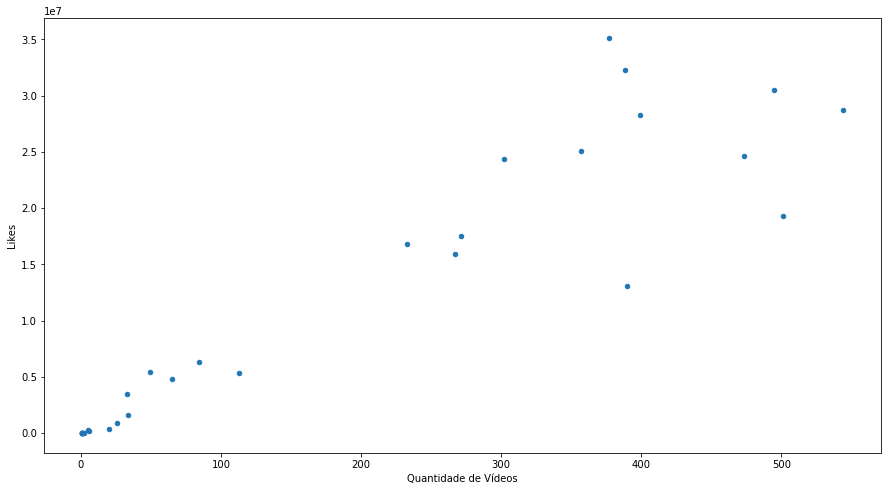

In [26]:
# Plotando o gráfico de dispersão entre a quantidade de vídeos x quantidade de likes

df2.plot.scatter(x='Quantidade de Vídeos', y='Likes')

In [27]:
# Calculando coeficiente angular e linear

coef_angular, coef_linear,_,_,std_err = linregress(df2['Quantidade de Vídeos'], df2['Likes'])

# A equação da reta se dará por:

reta = coef_angular * df2['Quantidade de Vídeos'] + coef_linear

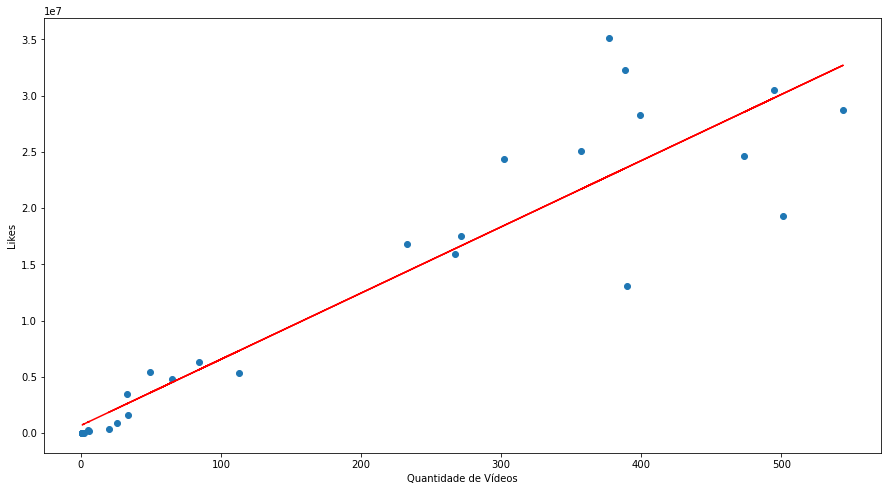



Desta forma, podemos deduzir, através da reta, que se fossem postados 700 vídeos em um só ano, teria 41.89M likes


In [28]:
# Plotando o gráfico novamente, mas dessa vez com a reta da regressão linear

plt.scatter(df2['Quantidade de Vídeos'], df2['Likes'])
plt.plot(df2['Quantidade de Vídeos'], reta, color='red')
plt.xlabel('Quantidade de Vídeos')
plt.ylabel('Likes')
plt.show()
print(f"\n\nDesta forma, podemos deduzir, através da reta, que se fossem postados 700 vídeos em um só ano, teria {(coef_angular * 700 + coef_linear)/1000000:.2f}M likes")

#### Técnicas de redução de dimensões - agrupamento de dados

As técnicas de redução dimensional são utilizadas quando trabalha-se com datasets baseados em várias features. Neste método as dimensões são reduzidas para um número em que seja possível analisar os dados contidos no dataset, sem que haja a perda muito grande de informações e mantenha-se a performance do modelo.
Sem a redução dimensional ficaria muito mais difícil conseguir tirar alguma conclusão dos dados analisados, além de que trabalhar com milhares de dimensões necessita de um poder computacional muito grande e, obviamente, não conseguiríamos representar graficamente os resultados.

Um fato importante à respeito de datasets que possuem muitas dimesões é a chamada "Maldição da Dimensionalidade", em que há uma dificuldade de análise dos dados num espaço tão grande, pois nele pode acontecer dos dados ficarem todos distantes uns dos outros.

À princípio, vamos transformar todos os título do dataset em vetores para que o kmeans possamos usá-los:

In [29]:
vectorizer2 = CountVectorizer()
X2 = vectorizer2.fit_transform(df['title'])
print(X2.toarray())
print("Checando se a quantidade de elementos é igual no resultado e no data set: \n")
print(f"Elementos no resultado: {len(X2.toarray())}")
print(f"Elementos no dataset original: {len(df['title'])}")
print(f"Cada elemento no resultado possui {len(X2.toarray()[0])} dimensões")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Checando se a quantidade de elementos é igual no resultado e no data set: 

Elementos no resultado: 5440
Elementos no dataset original: 5440
Cada elemento no resultado possui 6228 dimensões


Nessa etapa vamos transformar as 6228 dimensões em 2 para que seja visível no gráfico

In [30]:
svd = TruncatedSVD(n_components=2)
svd.fit(X2)
redut = svd.transform(X2)
print(redut)

[[ 4.79503933e-02  4.22426877e-02]
 [ 2.50298578e+00 -9.37286229e-01]
 [ 3.38808555e-01  8.44571374e-01]
 ...
 [ 8.39827782e-01 -2.47560736e-01]
 [ 1.18124604e-04 -1.12712359e-04]
 [ 8.67159335e-01 -2.21535833e-01]]


A partir desse ponto podemos treinar o nosso modelo de clusterização utilizando o Kmeans

In [31]:
kmeans = KMeans(n_clusters = 4,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 100,                 # MaX2imum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 1)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X2)

E, finalmente, podemos plotar o gráfico resultante da clusterização

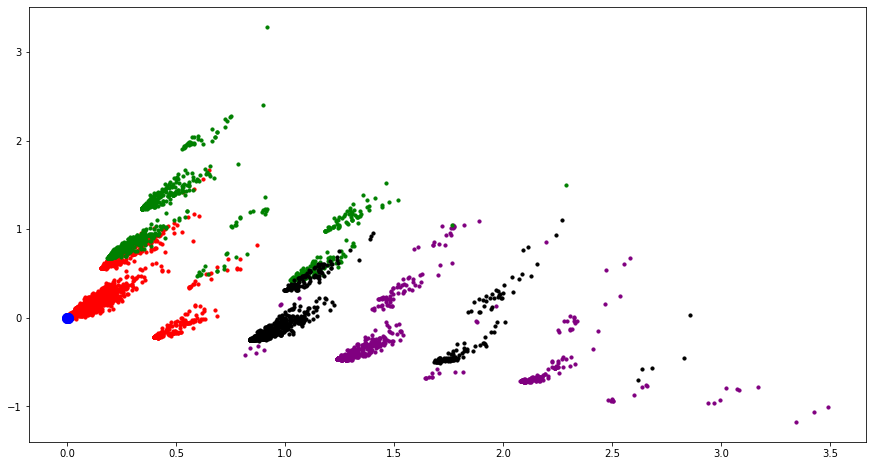

In [32]:
plt.scatter(redut[pred_y==0, 0], redut[pred_y==0, 1], s=10, c='red', label ='Cluster 1')
plt.scatter(redut[pred_y==1, 0], redut[pred_y==1, 1], s=10, c='purple', label ='Cluster 2')
plt.scatter(redut[pred_y==2, 0], redut[pred_y==2, 1], s=10, c='green', label ='Cluster 3')
plt.scatter(redut[pred_y==3, 0], redut[pred_y==3, 1], s=10, c='black', label ='Cluster 4')


# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=100,                             # Set centroid size
            c='blue')                           # Set centroid color

plt.show()

In [33]:
# Criando dataframe para os títulos e o resultado do kmeans

df4 = pd.DataFrame()
df4['Titulos'] = df['title']
df4['Cluster'] = pred_y

cluster2 = df4[df4['Cluster'] == 2]
for c in cluster2['Titulos']:
    print(f"{c}\n")

Why is China appointing judges to combat climate change?

Cement's carbon problem — and 2 ways to fix it

You deserve the right to repair your stuff

A sex therapist's secret to rediscovering your spark

Smart solutions to decarbonize buildings

How to provide cooling for everyone — without warming the planet

4 ways to redefine power at work to include women of color

How to boost nature-based solutions to climate change

Are brain waves the secret to treating Alzheimer's?

What if women built the world they want to see?

How to fix broken supply chains

What you need to know about carbon removal

How to break down barriers and not accept limits

Why is it so hard to escape poverty?

How to realistically decarbonize the oil and gas industry

I'm tired of people telling me to "grind"

Language shouldn't be a barrier to climate action

It's time to write a new climate story

How to escape the cynicism trap

A new way to help young people with their mental health

How to deal with your i

# Conclusão

Apesar do dataframe limitado no quesito especificidade dos dados, foi possível extrair o máximo possível, de forma que poderia ser desenvolvidos mais gráficos, a fim de demonstrar maiores relações entre vídeos postados, likes, visualizações, autores e anos de postagem, por exemplo. O trabalho poderia melhorar na questão da forma de análise de dados, de forma a aprofundar-se mais na particularidade dos vídeos e/ou autores e entender melhor o agrupamento dos dados realizados.